### In-sample convergence

#### Single trial in-sample

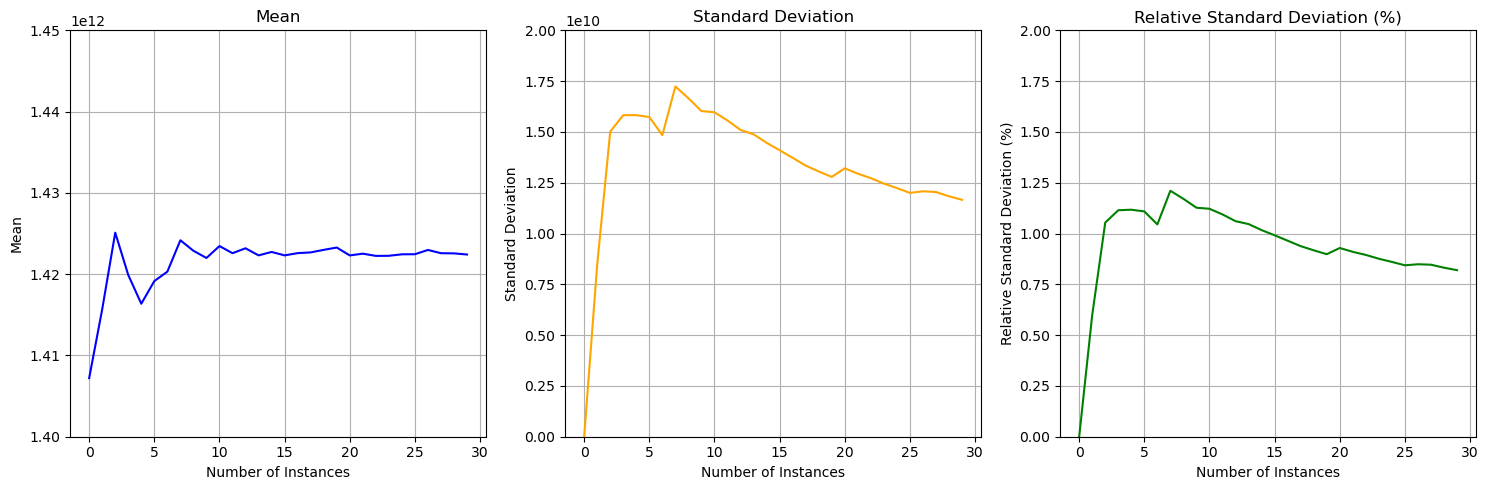

In [420]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ylims_mean = dict({
    10: [1.35*10**12, 1.5*10**12], 
    50: [1.40*10**12, 1.45*10**12],
    100: [1.40*10**12, 1.45*10**12]
})

ylims_std = dict({
    10: [0, 5*10**10], 
    50: [0, 2*10**10],
    100: [0, 2*10**10]
})

ylims_rel_std = dict({
    10: [0, 4], 
    50: [0, 2],
    100: [0, 2]
})


method = "filter10"
num_scenarios = 50

base_folder = f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(num_scenarios)}"

values = [float(pd.read_csv(base_folder + "/" + str(i) + "/results_objective.csv").columns[0].split(":")[1]) for i in range(1, 31)]

random.shuffle(values)

obj_values = []

for i in range(0, 30):
    appending_values = []
    for j in range(0, i + 1):
        appending_values.append(values[j])
    obj_values.append(appending_values)

mean_values = [np.mean(x) for x in obj_values]
std_values = [np.std(x) for x in obj_values]
rel_std_values = [std_values[i] / mean_values[i] * 100 for i in range(len(std_values))]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot mean
axs[0].plot(range(0, 30), mean_values, label='Mean', color='blue')
axs[0].set_xlabel('Number of Instances')
axs[0].set_ylabel('Mean')
axs[0].set_title('Mean')
axs[0].set_ylim(ylims_mean[num_scenarios][0], ylims_mean[num_scenarios][1])
axs[0].grid(True)

# Plot standard deviation
axs[1].plot(range(0, 30), std_values, label='Standard Deviation', color='orange')
axs[1].set_xlabel('Number of Instances')
axs[1].set_ylabel('Standard Deviation')
axs[1].set_title('Standard Deviation')
axs[1].set_ylim(ylims_std[num_scenarios][0], ylims_std[num_scenarios][1])
axs[1].grid(True)

# Plot relative standard deviation
axs[2].plot(range(0, 30), rel_std_values, label='Relative Standard Deviation (%)', color='green')
axs[2].set_xlabel('Number of Instances')
axs[2].set_ylabel('Relative Standard Deviation (%)')
axs[2].set_title('Relative Standard Deviation (%)')
axs[2].set_ylim(ylims_rel_std[num_scenarios][0], ylims_rel_std[num_scenarios][1])
axs[2].grid(True)

plt.tight_layout()
plt.show()

#### Multiple trials

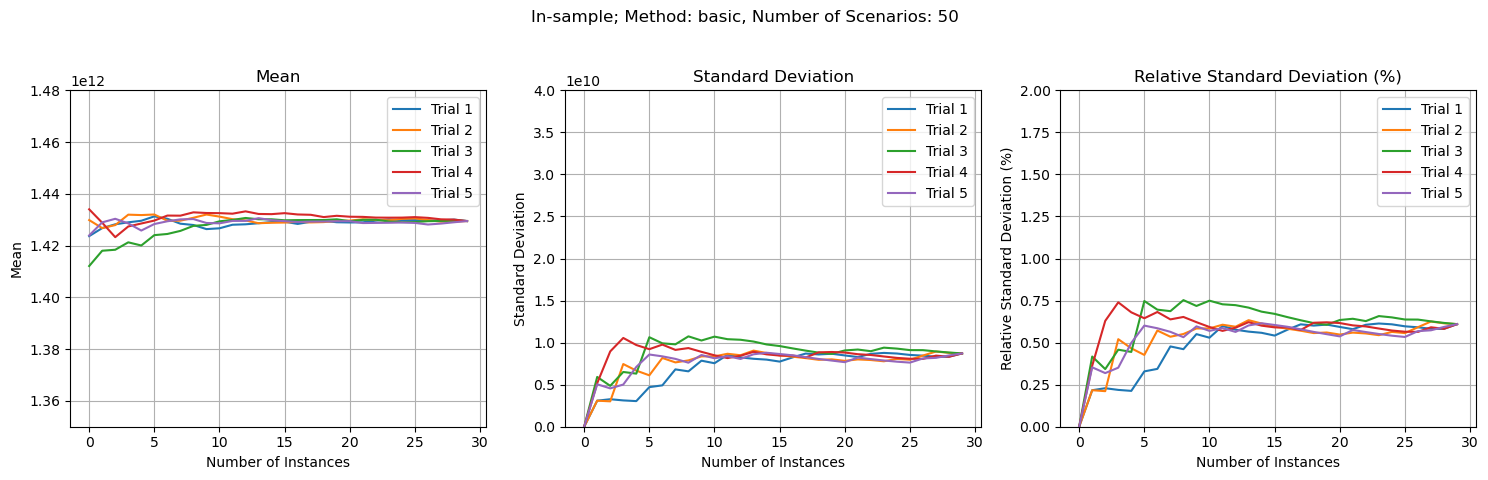

In [421]:
ylims_mean = {10: [1.35e12, 1.5e12], 50: [1.35e12, 1.48e12], 100: [1.35e12, 1.48e12]}
ylims_std = {10: [0, 5e10], 50: [0, 4e10], 100: [0, 4e10]}
ylims_rel_std = {10: [0, 4], 50: [0, 2], 100: [0, 2]}

method = "basic"
num_scenarios = 50

base_folder = f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(num_scenarios)}"

num_trials = 5  # Number of trials
num_instances = 30

all_mean_values = []
all_std_values = []
all_rel_std_values = []

for _ in range(num_trials):
    values = [float(pd.read_csv(base_folder + "/" + str(i) + "/results_objective.csv").columns[0].split(":")[1]) for i in range(1, num_instances + 1)]

    random.shuffle(values)

    obj_values = []

    for i in range(0, num_instances):
        appending_values = []
        for j in range(0, i + 1):
            appending_values.append(values[j])
        obj_values.append(appending_values)

    mean_values = [np.mean(x) for x in obj_values]
    std_values = [np.std(x) for x in obj_values]
    rel_std_values = [std_values[i] / mean_values[i] * 100 for i in range(len(std_values))]

    all_mean_values.append(mean_values)
    all_std_values.append(std_values)
    all_rel_std_values.append(rel_std_values)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot mean for each trial
for idx, mean_values in enumerate(all_mean_values):
    axs[0].plot(range(num_instances), mean_values, label=f'Trial {idx+1}')

axs[0].set_xlabel('Number of Instances')
axs[0].set_ylabel('Mean')
axs[0].set_title('Mean')
axs[0].set_ylim(ylims_mean[num_scenarios][0], ylims_mean[num_scenarios][1])
axs[0].grid(True)
axs[0].legend()


# Plot standard deviation for each trial
for idx, std_values in enumerate(all_std_values):
    axs[1].plot(range(num_instances), std_values, label=f'Trial {idx+1}')

axs[1].set_xlabel('Number of Instances')
axs[1].set_ylabel('Standard Deviation')
axs[1].set_title('Standard Deviation')
axs[1].set_ylim(ylims_std[num_scenarios][0], ylims_std[num_scenarios][1])
axs[1].grid(True)
axs[1].legend()


# Plot relative standard deviation for each trial
for idx, rel_std_values in enumerate(all_rel_std_values):
    axs[2].plot(range(num_instances), rel_std_values, label=f'Trial {idx+1}')

axs[2].set_xlabel('Number of Instances')
axs[2].set_ylabel('Relative Standard Deviation (%)')
axs[2].set_title('Relative Standard Deviation (%)')
axs[2].set_ylim(ylims_rel_std[num_scenarios][0], ylims_rel_std[num_scenarios][1])
axs[2].grid(True)
axs[2].legend()

# Add supertitle
fig.suptitle(f"In-sample; Method: {method}, Number of Scenarios: {num_scenarios}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make space for the suptitle
plt.show()

### OOS convergence

#### Single trial OOS

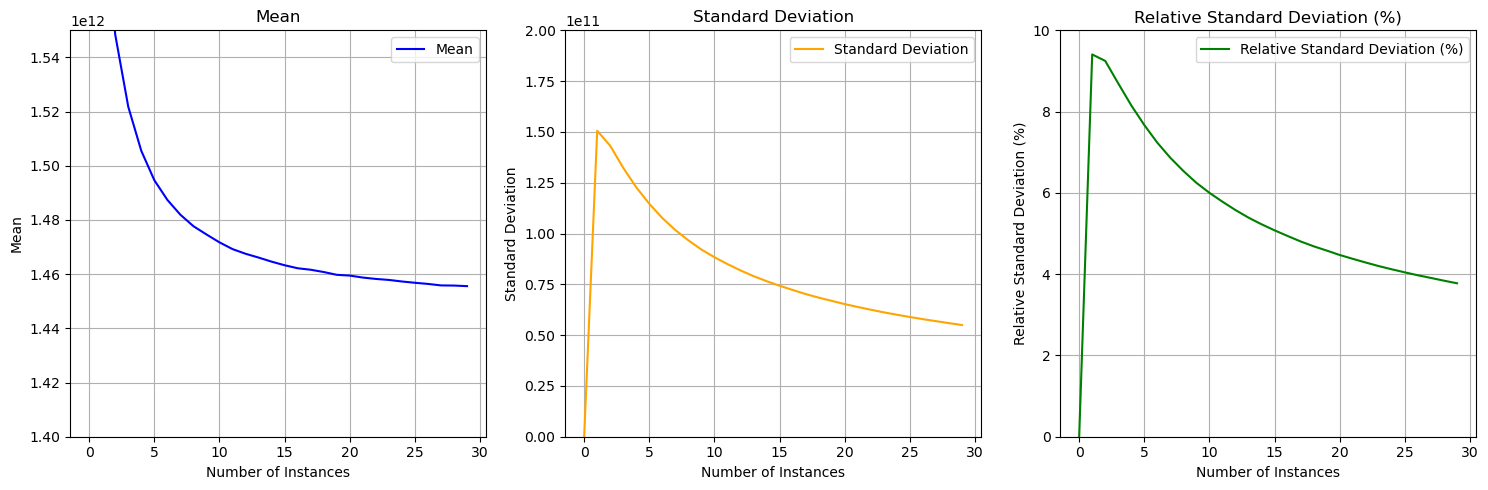

In [422]:
ylims_mean = dict({
    10: [1*10**12, 4*10**12], 
    50: [1.4*10**12, 1.55*10**12],
    100: [1.4*10**12, 1.55*10**12]
})

ylims_std = dict({
    10: [0, 1*10**12], 
    50: [0, 2*10**11],
    100: [0, 2*10**11]
})

ylims_rel_std = dict({
    10: [0, 40], 
    50: [0, 10],
    100: [0, 10]
})


method = "filter10"
num_scenarios = 100

base_folder = f"NewOOS/dataset_europe_agg_v50/{method}_sce{str(num_scenarios)}"

values = []

for i in range(1, 31):
    oos_value = 0
    num_trees_considered = 0
    for j in range(1, 11):
        oos_value_path = base_folder + f"_{i}/oos_tree{j}/out_of_sample_values.csv"
        df_oos_value = pd.read_csv(oos_value_path)
        oos_tree_value = float(df_oos_value["Objective value"][0])
        oos_value += oos_tree_value
        num_trees_considered += 1
    values.append(oos_value / num_trees_considered)

random.shuffle(values)

obj_values = []

for i in range(0, 30):
    appending_values = []
    for j in range(0, i + 1):
        appending_values.append(values[j])
    obj_values.append(appending_values)

mean_values = [np.mean(x) for x in obj_values]
std_values = [np.std(x) for x in obj_values]
rel_std_values = [std_values[i] / mean_values[i] * 100 for i in range(len(std_values))]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot mean
axs[0].plot(range(0, 30), mean_values, label='Mean', color='blue')
axs[0].set_xlabel('Number of Instances')
axs[0].set_ylabel('Mean')
axs[0].set_title('Mean')
axs[0].set_ylim(ylims_mean[num_scenarios][0], ylims_mean[num_scenarios][1])
axs[0].grid(True)
axs[0].legend()

# Plot standard deviation
axs[1].plot(range(0, 30), std_values, label='Standard Deviation', color='orange')
axs[1].set_xlabel('Number of Instances')
axs[1].set_ylabel('Standard Deviation')
axs[1].set_title('Standard Deviation')
axs[1].set_ylim(ylims_std[num_scenarios][0], ylims_std[num_scenarios][1])
axs[1].grid(True)
axs[1].legend()


# Plot relative standard deviation
axs[2].plot(range(0, 30), rel_std_values, label='Relative Standard Deviation (%)', color='green')
axs[2].set_xlabel('Number of Instances')
axs[2].set_ylabel('Relative Standard Deviation (%)')
axs[2].set_title('Relative Standard Deviation (%)')
axs[2].set_ylim(ylims_rel_std[num_scenarios][0], ylims_rel_std[num_scenarios][1])
axs[2].grid(True)
axs[2].legend()


plt.tight_layout()
plt.show()


#### Multiple trials

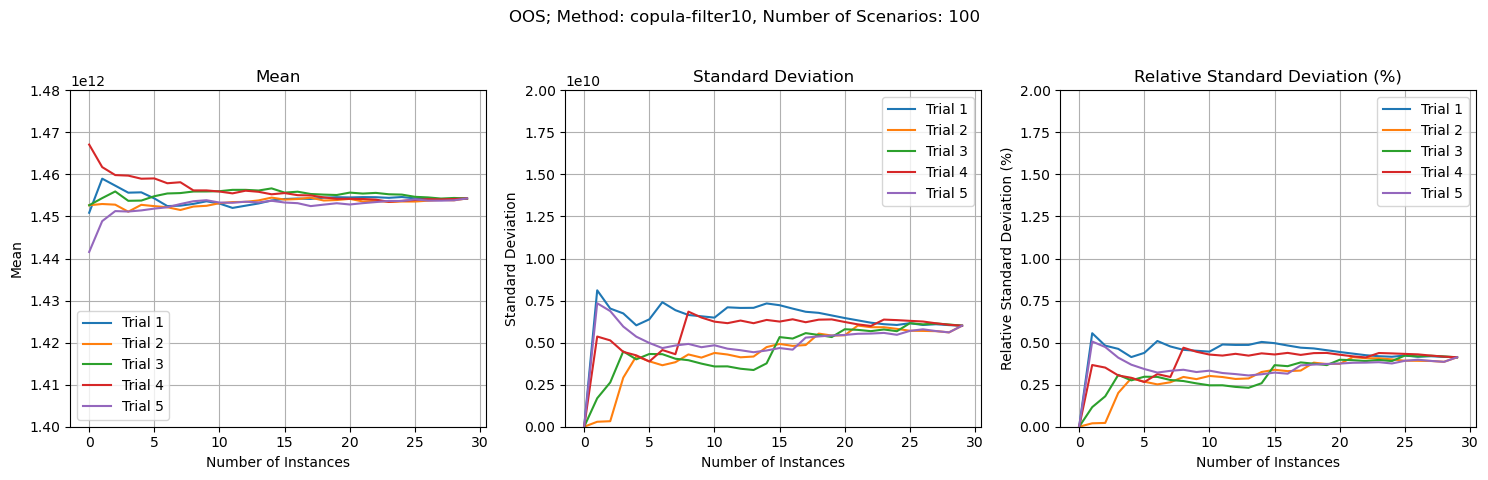

In [423]:
ylims_mean = {10: [1.35e12, 1.5e12], 50: [1.4e12, 1.45e12], 100: [1.4e12, 1.48e12]}
ylims_std = {10: [0, 5e10], 50: [0, 2e10], 100: [0, 2e10]}
ylims_rel_std = {10: [0, 4], 50: [0, 2], 100: [0, 2]}

method = "copula-filter10"
num_scenarios = 100

base_folder = f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(num_scenarios)}"

num_trials = 5  # Number of trials
num_instances = 30

all_mean_values = []
all_std_values = []
all_rel_std_values = []

for _ in range(num_trials):
    values = [float(pd.read_csv(base_folder + "/" + str(i) + "/results_objective.csv").columns[0].split(":")[1]) for i in range(1, num_instances + 1)]
    random.shuffle(values)
    obj_values = []
    for i in range(0, num_instances):
        appending_values = []
        for j in range(0, i + 1):
            appending_values.append(values[j])
        obj_values.append(appending_values)

    mean_values = [np.mean(x) for x in obj_values]
    std_values = [np.std(x) for x in obj_values]
    rel_std_values = [std_values[i] / mean_values[i] * 100 for i in range(len(std_values))]

    all_mean_values.append(mean_values)
    all_std_values.append(std_values)
    all_rel_std_values.append(rel_std_values)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot mean for each trial
for idx, mean_values in enumerate(all_mean_values):
    axs[0].plot(range(num_instances), mean_values, label=f'Trial {idx+1}')

axs[0].set_xlabel('Number of Instances')
axs[0].set_ylabel('Mean')
axs[0].set_title('Mean')
axs[0].set_ylim(ylims_mean[num_scenarios][0], ylims_mean[num_scenarios][1])
axs[0].grid(True)
axs[0].legend()

# Plot standard deviation for each trial
for idx, std_values in enumerate(all_std_values):
    axs[1].plot(range(num_instances), std_values, label=f'Trial {idx+1}')

axs[1].set_xlabel('Number of Instances')
axs[1].set_ylabel('Standard Deviation')
axs[1].set_title('Standard Deviation')
axs[1].set_ylim(ylims_std[num_scenarios][0], ylims_std[num_scenarios][1])
axs[1].grid(True)
axs[1].legend()

# Plot relative standard deviation for each trial
for idx, rel_std_values in enumerate(all_rel_std_values):
    axs[2].plot(range(num_instances), rel_std_values, label=f'Trial {idx+1}')

axs[2].set_xlabel('Number of Instances')
axs[2].set_ylabel('Relative Standard Deviation (%)')
axs[2].set_title('Relative Standard Deviation (%)')
axs[2].set_ylim(ylims_rel_std[num_scenarios][0], ylims_rel_std[num_scenarios][1])
axs[2].grid(True)
axs[2].legend()

# Add supertitle
fig.suptitle(f"OOS; Method: {method}, Number of Scenarios: {num_scenarios}")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make space for the suptitle

plt.show()
